## We will do the below task using word2vec custom model training
- Take one dataset from kaggle from any where(web)
- train you custom word2vec model
- then reduce dimesion of vectors into 2 dimesion using PCA(dimesion reduction)
- then plot the data using graph(plot 2-d data)
- check the similarity between the words

In [1]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
import pandas as pd
import numpy as np
import os
import gensim
import nltk
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [2]:
model = api.load('word2vec-google-news-300')

In [3]:
# Loading ramayana from github
import os
import requests

def download_github_folder(repo_url, folder_path, local_dir):
    """
    Download a folder and its files from a GitHub repository.

    Args:
        repo_url (str): GitHub repository URL 
        folder_path (str): Path to the folder in the repository (e.g., 'path/to/folder').
        local_dir (str): Local directory to save the downloaded folder.
    Returns:
        None
    """
    # Extract owner and repo name from the URL
    url_parts = repo_url.rstrip('/').split('/')
    owner, repo = url_parts[-2], url_parts[-1]

    # GitHub API endpoint for the folder
    api_url = f"https://api.github.com/repos/{owner}/{repo}/contents/{folder_path}"

    # Send a GET request to the GitHub API
    response = requests.get(api_url)

    # Handle possible errors
    if response.status_code != 200:
        print(f"Failed to fetch folder contents. Error: {response.status_code}")
        return

    # Parse the response JSON
    contents = response.json()

    # Create the local directory if it doesn't exist
    os.makedirs(local_dir, exist_ok=True)

    for item in contents:
        if item['type'] == 'file':
            # Download the file
            file_url = item['download_url']
            file_path = os.path.join(local_dir, item['name'])
            print(f"Downloading {file_url} to {file_path}...")
            file_response = requests.get(file_url)
            with open(file_path, 'wb') as f:
                f.write(file_response.content)
        elif item['type'] == 'dir':
            # Recursively download subfolders
            subfolder_path = os.path.join(folder_path, item['name'])
            subfolder_local_dir = os.path.join(local_dir, item['name'])
            download_github_folder(repo_url, subfolder_path, subfolder_local_dir)

# Example Usage
repo_url = "https://github.com/cltk/sanskrit_parallel_gitasupersite"
folder_path = "ramayana"
local_dir = "/Users/praveensrivas/Documents/NLPwithGenAI/NLP_GEN_AI/Ramayan_book_data/"

download_github_folder(repo_url, folder_path, local_dir)


In [4]:
story = []
folder_path = r"/Users/praveensrivas/Documents/NLPwithGenAI/NLP_GEN_AI/Ramayan_book_data/"
for filename in os.listdir(folder_path):
  file_path = os.path.join(folder_path,filename)
  with open(file_path,encoding='unicode_escape') as f:
    corpus = f.read()
  raw_sent = sent_tokenize(corpus)
  for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [5]:
custom_model = gensim.models.Word2Vec(window=3,min_count=7,vector_size=150,sg=1)

In [6]:
custom_model.build_vocab(story)

In [7]:
custom_model.corpus_count

18763

In [8]:
custom_model.train(story,total_examples=len(story), epochs=10)

(2610501, 5033470)

In [9]:
custom_model.wv["king"].shape

(150,)

In [10]:
# Reducing dimension of the data using TSNE
from sklearn.manifold import TSNE

num_dimension = 2

#vector and labels
vectors = np.asarray(custom_model.wv.vectors)
labels = np.asarray(custom_model.wv.index_to_key)

#apply tsne
tsne = TSNE(n_components=num_dimension, random_state=0)
vectors = tsne.fit_transform(vectors)


In [12]:

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

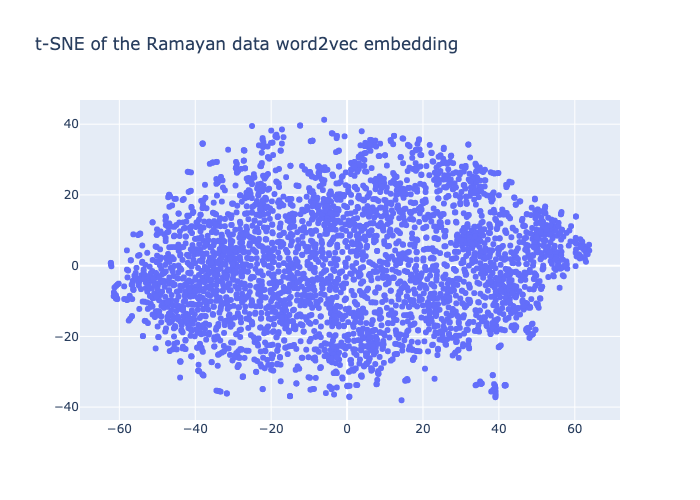

In [17]:
#Visualize embeddings with TSNE and Plotly
import plotly.graph_objs as go
fig = go.Figure()
trace = go.Scatter(x=x_vals,y=y_vals,mode='markers',text=labels)
fig.add_trace(trace=trace)
fig.update_layout(title="t-SNE of the Ramayan data word2vec embedding")
fig.show()
fig.show("png")


In [18]:
print(custom_model.wv.most_similar("rama"))

[('walking', 0.5548046231269836), ('elder', 0.5542364716529846), ('satrughna', 0.5448898673057556), ('lakshamana', 0.5164456367492676), ('danu', 0.5128525495529175), ('ah', 0.5042979121208191), ('younger', 0.4972449541091919), ('regent', 0.49616438150405884), ('goodnatured', 0.4958742558956146), ('kakutsthas', 0.492857962846756)]


In [19]:
print(custom_model.wv.most_similar("sita"))

[('vaidehi', 0.739565908908844), ('janaki', 0.6743127107620239), ('princess', 0.6478567719459534), ('alas', 0.5674639940261841), ('videha', 0.5644979476928711), ('lady', 0.5591866970062256), ('crying', 0.5455074310302734), ('cottage', 0.5385908484458923), ('helplessly', 0.5373876690864563), ('largeeyed', 0.5367457866668701)]


In [20]:
print(custom_model.wv.doesnt_match(['sita', 'rama', 'laxman', 'hanuman']))

hanuman


In [21]:
# saving model
# custom_model.save("word2vec_custom_ramayan_model")
print(custom_model.wv.most_similar(positive=['rama'],topn=3))

[('walking', 0.5548046231269836), ('elder', 0.5542364716529846), ('satrughna', 0.5448898673057556)]


In [22]:
custom_model.wv.similarity('prince','rama')

0.48363337